<a href="https://colab.research.google.com/github/Davidossec/Davidossec/blob/main/Terremotos_en_EEUU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#En esta ocasión probaremos paquetes de python con un dataset sobre terremotos en EEUU.

Lo primero que realizaremos es conectarnos a google drive desde google colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Seguido de ello, importaremos/instalaremos todos los paquetes que vayamos a utilizar

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

Con los paquetes ya importados, leeremos nuestros datos con Pandas.
Estos datos son sobre los terremotos en EEUU entre los años 1990 y 2023.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Proyectos/earthquake_1965-2016.csv')

 0   Date                      
 1   Time                       
 2   Latitude              
 3   Longitude               
 4   Type                   
 5   Depth                     
 6   Depth Error               
 7   Depth Seismic Stations     
 8   Magnitude                
 9   Magnitude Type           
 10  Magnitude Error            
 11  Magnitude Seismic Stations
 12  Azimuthal Gap               
 13  Horizontal Distance        
 14  Horizontal Error          
 15  Root Mean Square            
 16  ID                         
 17  Source                     
 18  Location Source             
 19  Magnitude Source            
 20  Status           

Ya tenemos nuestro dataframe en pandas, vamos a revisar su contenido



In [4]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


Features



In [5]:
df.tail(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23402,12/24/2016,03:58:55,-5.1460,153.5166,Earthquake,30.00,1.8,NaN,5.8,MWW,...,NaN,14.00,1.648,7.0,0.8500,US10007MFP,US,US,US,Reviewed
23403,12/25/2016,14:22:27,-43.4029,-73.9395,Earthquake,38.00,1.9,NaN,7.6,MWW,...,NaN,29.00,0.351,6.8,0.8000,US10007MN3,US,US,US,Reviewed
23404,12/25/2016,14:32:13,-43.4810,-74.4771,Earthquake,14.93,3.3,NaN,5.6,MB,...,83.0,96.00,0.697,7.1,0.5200,US10007MNB,US,US,US,Reviewed
23405,12/27/2016,23:20:56,45.7192,26.5230,Earthquake,97.00,1.8,NaN,5.6,MWW,...,NaN,14.00,0.465,5.1,0.7800,US10007N3R,US,US,US,Reviewed
23406,12/28/2016,08:18:01,38.3754,-118.8977,Earthquake,10.80,1.3,34.0,5.6,ML,...,20.0,35.86,0.132,NaN,0.1988,NN00570709,NN,NN,NN,Reviewed
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


Ya tenemos una pincelada de cómo se conforman  las columnas y qué tipo de información podemos esperar encontrar. Sin embargo, veamos si estos son coherentes y si hay algún patrón incipiente.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [7]:
round(df.describe(),2)

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.00,23412.00,23412.00,4461.00,7097.00,23412.00,327.00,2564.00,7299.00,1604.00,1156.00,17352.00
mean,1.68,39.64,70.77,4.99,275.36,5.88,0.07,48.94,44.16,3.99,7.66,1.02
std,30.11,125.51,122.65,4.88,162.14,0.42,0.05,62.94,32.14,5.38,10.43,0.19
min,-77.08,-180.00,-1.10,0.00,0.00,5.50,0.00,0.00,0.00,0.00,0.08,0.00
25%,-18.65,-76.35,14.52,1.80,146.00,5.60,0.05,10.00,24.10,0.97,5.30,0.90
50%,-3.57,103.98,33.00,3.50,255.00,5.70,0.06,28.00,36.00,2.32,6.70,1.00
75%,26.19,145.03,54.00,6.30,384.00,6.00,0.08,66.00,54.00,4.72,8.10,1.13
max,86.00,180.00,700.00,91.30,934.00,9.10,0.41,821.00,360.00,37.87,99.00,3.44


Ahora comprobaremos si existen datos faltantes y duplicados

*Veamos qué tal los valores faltantes*

In [8]:
#Utilizando Pandas
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

<Axes: >

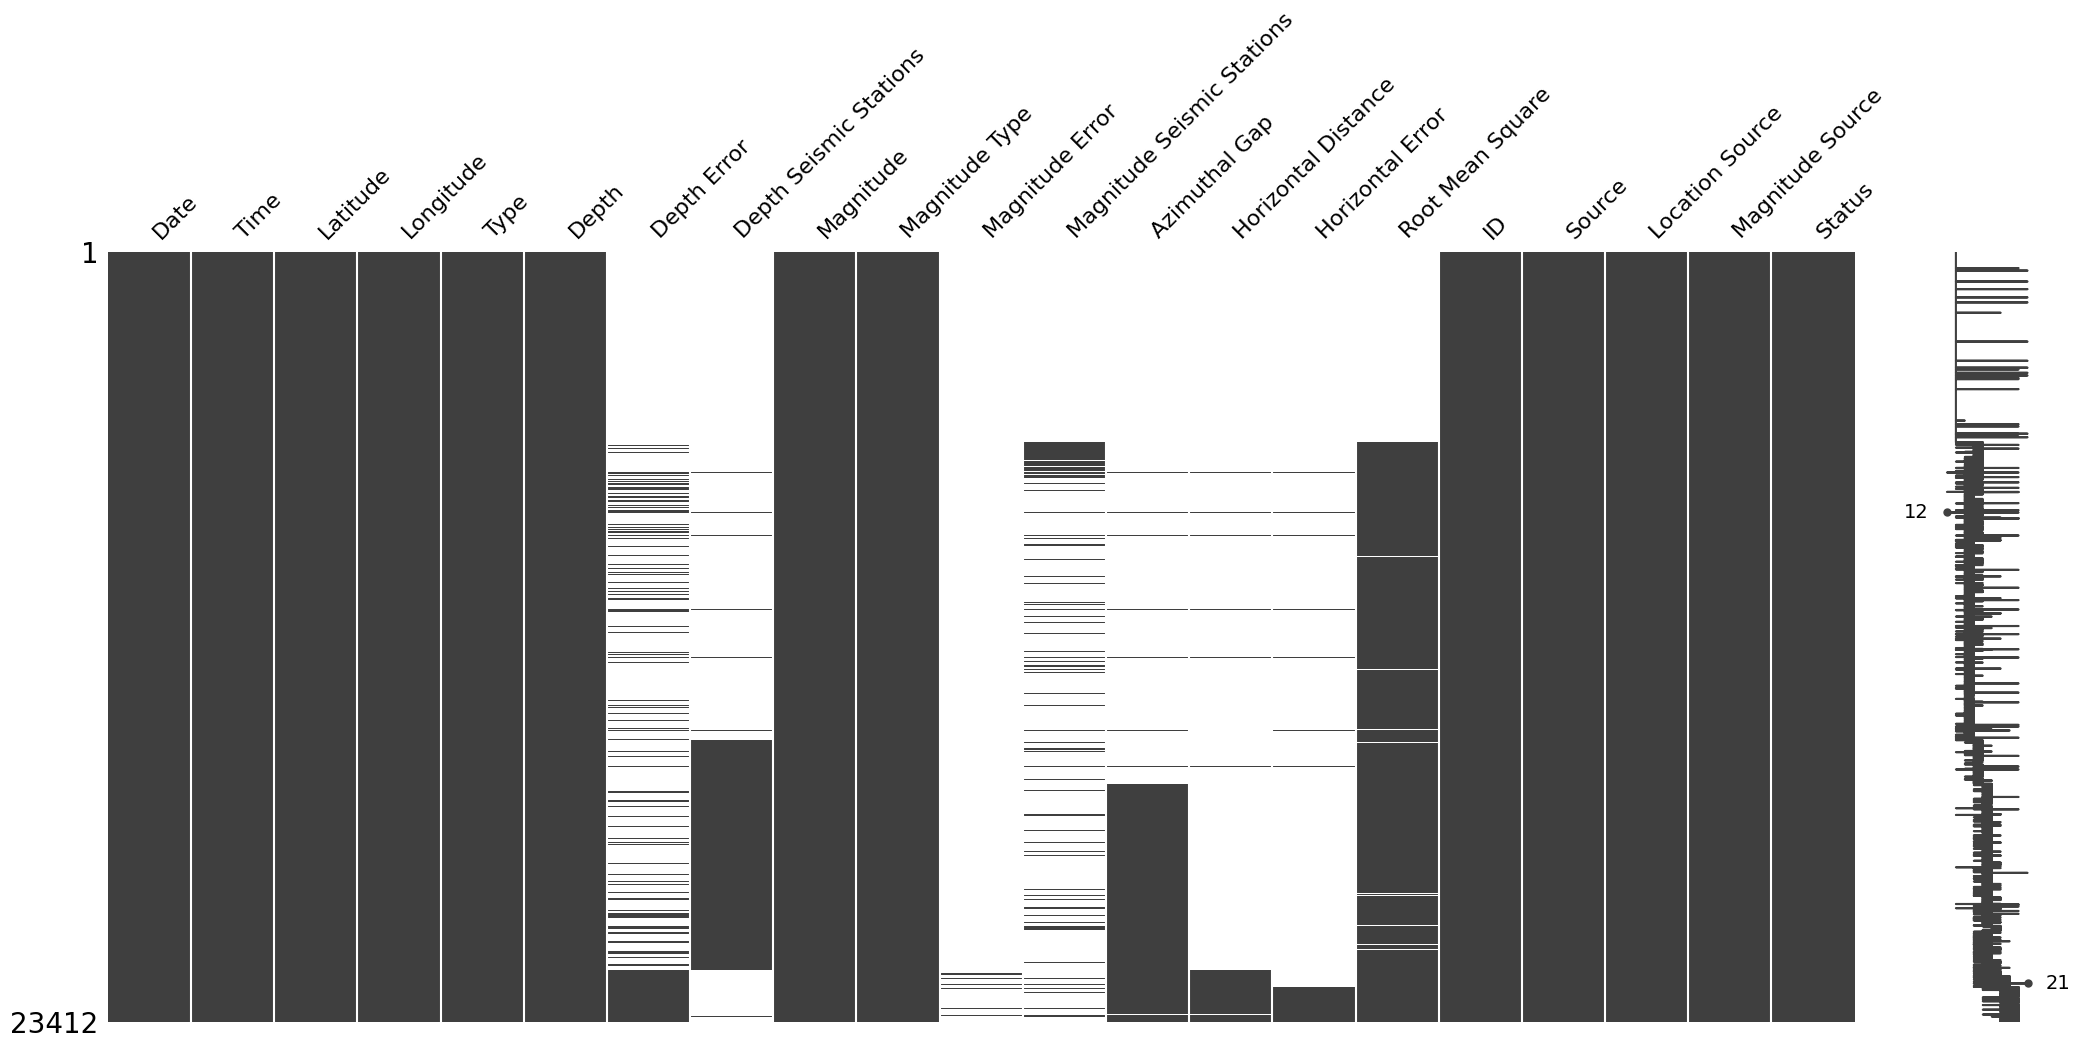

In [9]:
#Utilizando el paquete missingno
msno.matrix(df)

<Axes: >

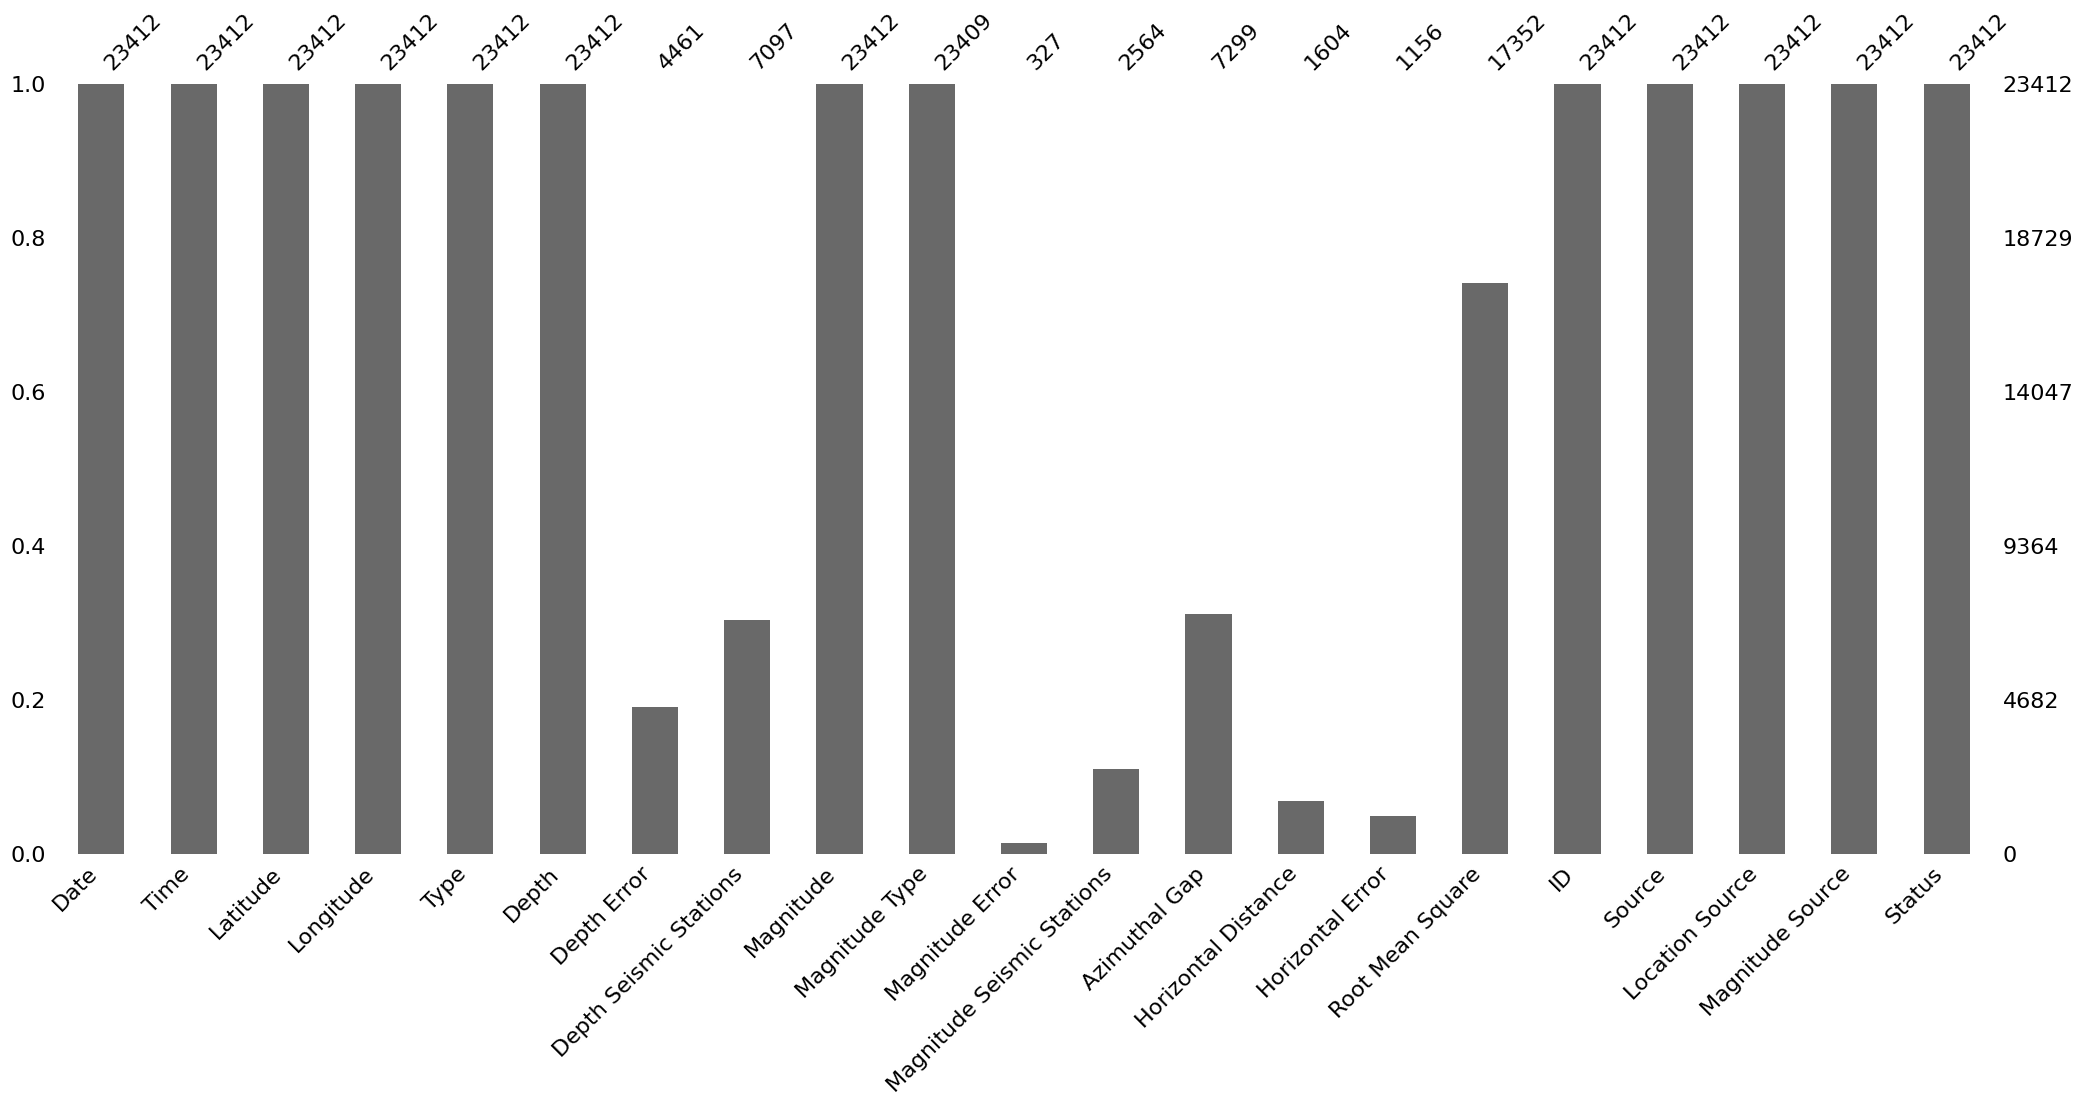

In [10]:
msno.bar(df)

Al parecer, tenemos bastantes valores faltantes.


<Axes: >

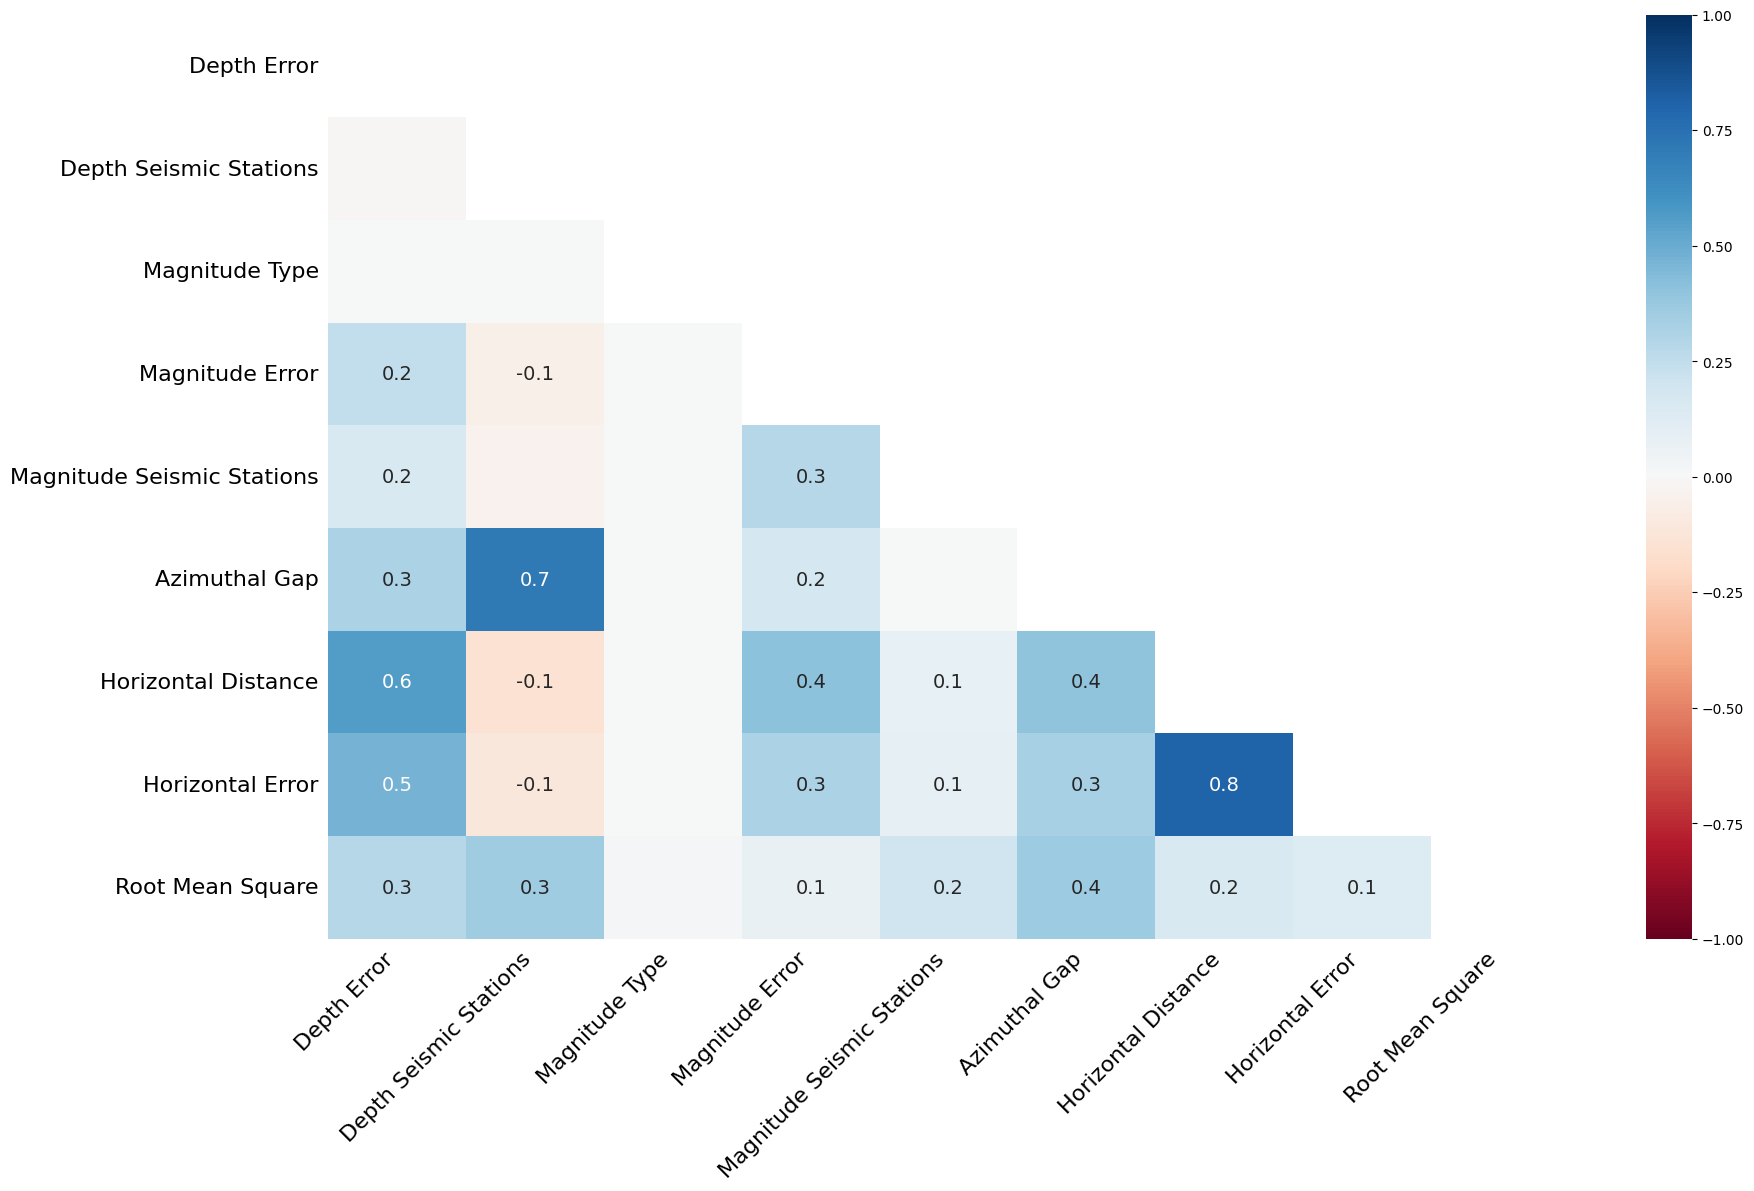

In [11]:
msno.heatmap(df)

*Veamos qué tal los valores duplicados*


In [13]:
df.nunique()

Date                          12401
Time                          20472
Latitude                      20676
Longitude                     21474
Type                              4
Depth                          3485
Depth Error                     297
Depth Seismic Stations          736
Magnitude                        64
Magnitude Type                   10
Magnitude Error                 100
Magnitude Seismic Stations      246
Azimuthal Gap                  1109
Horizontal Distance            1448
Horizontal Error                186
Root Mean Square                190
ID                            23412
Source                           13
Location Source                  48
Magnitude Source                 24
Status                            2
dtype: int64

In [14]:
df.duplicated().sum()

0

Antes de trabajar con estos datos, haremos una copia al dataframe

In [15]:
df_original = df.copy()

Si bien no hay datos duplicados, realizaré esto de todas formas

In [16]:
df_clean = df.drop_duplicates(keep='first')

Veamos la diferencia

In [17]:
print(f'La dimensión del dataframe original:',df_original.shape)
print(f'La dimensión del dataframe sin duplicados:',df_clean.shape)

La dimensión del dataframe original: (23412, 21)
La dimensión del dataframe sin duplicados: (23412, 21)


Trabajemos los datos faltantes

In [18]:
thresh = 0.25 * df_clean.shape[0]
thresh
missing_cols = df_clean.columns[df_clean.isna().sum() < thresh]
missing_cols

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source',
       'Status'],
      dtype='object')

In [19]:
missing_col_indices = df_clean.columns.get_indexer_for(missing_cols)
missing_col_indices

array([ 0,  1,  2,  3,  4,  5,  8,  9, 16, 17, 18, 19, 20])

In [20]:
#Seleccionamos las columnas con menos del 25% de valores faltantes
df_clean2 = df_clean.iloc[:, missing_col_indices]
df_clean2

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


In [21]:
df_clean2.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

Los datos de tipo de magnitud los imputaremos a la moda(ya que es un dato categórico)

In [22]:
df_clean2['Magnitude Type'].fillna(df_clean2['Magnitude Type'].mode()[0], inplace=True)
df_clean2.isna().sum()

<ipython-input-22-cc4da683e9ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean2['Magnitude Type'].fillna(df_clean2['Magnitude Type'].mode()[0], inplace=True)


Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

Estamos listos!

In [23]:
print(f'La dimensión del dataframe original:',df_original.shape)
print(f'La dimensión del dataframe imputada:',df_clean2.shape)

La dimensión del dataframe original: (23412, 21)
La dimensión del dataframe imputada: (23412, 13)


#Organicemos un poco los datos

Dentro del proyecto, analizaremos los datos, los tipos de datos e intentaremos ver si existen tendencias y patrones en ellos.

In [24]:
features = [i for i in df_clean2.columns]
numerical_features = []
categorical_features = []

for feature in features:
    if df_clean2[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print("El dataset tiene {} varibles numéricas and {} variables categóricas.".format(len(numerical_features), len(categorical_features)))


El dataset tiene 4 varibles numericas and 9 variables categoricas.


Variables numéricas

In [25]:
numerical_features

['Latitude', 'Longitude', 'Depth', 'Magnitude']

In [26]:
import math
def plot_numerical_features(df, numerical_features):

    print('Distribución de las variables numéricas'.center(100))

    n = 5

    clr = ['r', 'g', 'b', 'g', 'b', 'r']

    plt.figure(figsize=[15, 4 * math.ceil(len(numerical_features) / n)])
    for i in range(len(numerical_features)):
        plt.subplot(math.ceil(len(numerical_features) / 3), n, i + 1)
        sns.distplot(df[numerical_features[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10,
                     color=list(np.random.randint([255, 255, 255]) / 255))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=[15, 4 * math.ceil(len(numerical_features) / n)])
    for i in range(len(numerical_features)):
        plt.subplot(math.ceil(len(numerical_features) / 3), n, i + 1)
        df.boxplot(numerical_features[i])
    plt.tight_layout()
    plt.show()

                            Distribución de las variables numéricas                             


<ipython-input-26-129d8ae42418>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10,
<ipython-input-26-129d8ae42418>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]], hist_kws=dict(edgecolo

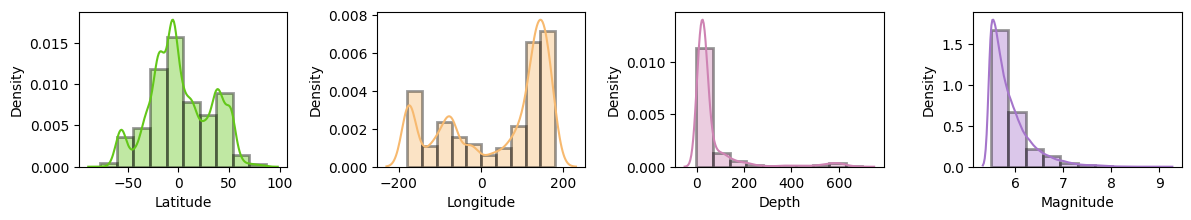

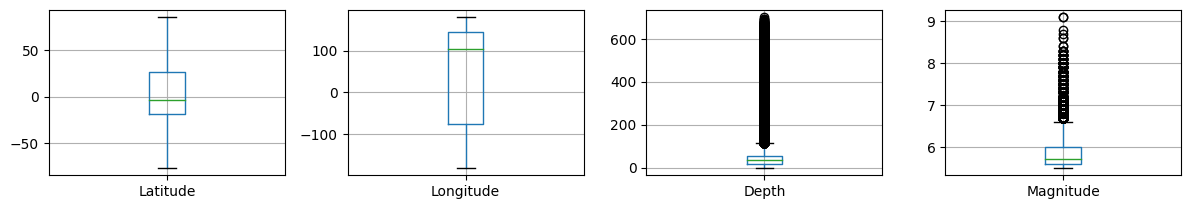

In [27]:
plot_numerical_features(df_clean, numerical_features)

Variable categóricas

In [30]:
categorical_features

['Date',
 'Time',
 'Type',
 'Magnitude Type',
 'ID',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [32]:
cat_feat_less_50nuq = [i for i in categorical_features if df_clean2[i].nunique() < 50]
cat_feat_less_50nuq

['Type',
 'Magnitude Type',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [28]:
from math import ceil
def cat_graphic(cat):
    count_CF = cat.shape[1]
    n_rows = ceil( count_CF / 4)
    n_col = ceil( count_CF / n_rows)
    f, ax = plt.subplots(nrows=n_rows, ncols=n_col, figsize=(18, n_rows * 20))
    ax = ax.flat
    for i, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax=ax[i])
        ax[i].set_title(variable, fontsize=8, fontweight="bold")
        ax[i].tick_params(labelsize=10)

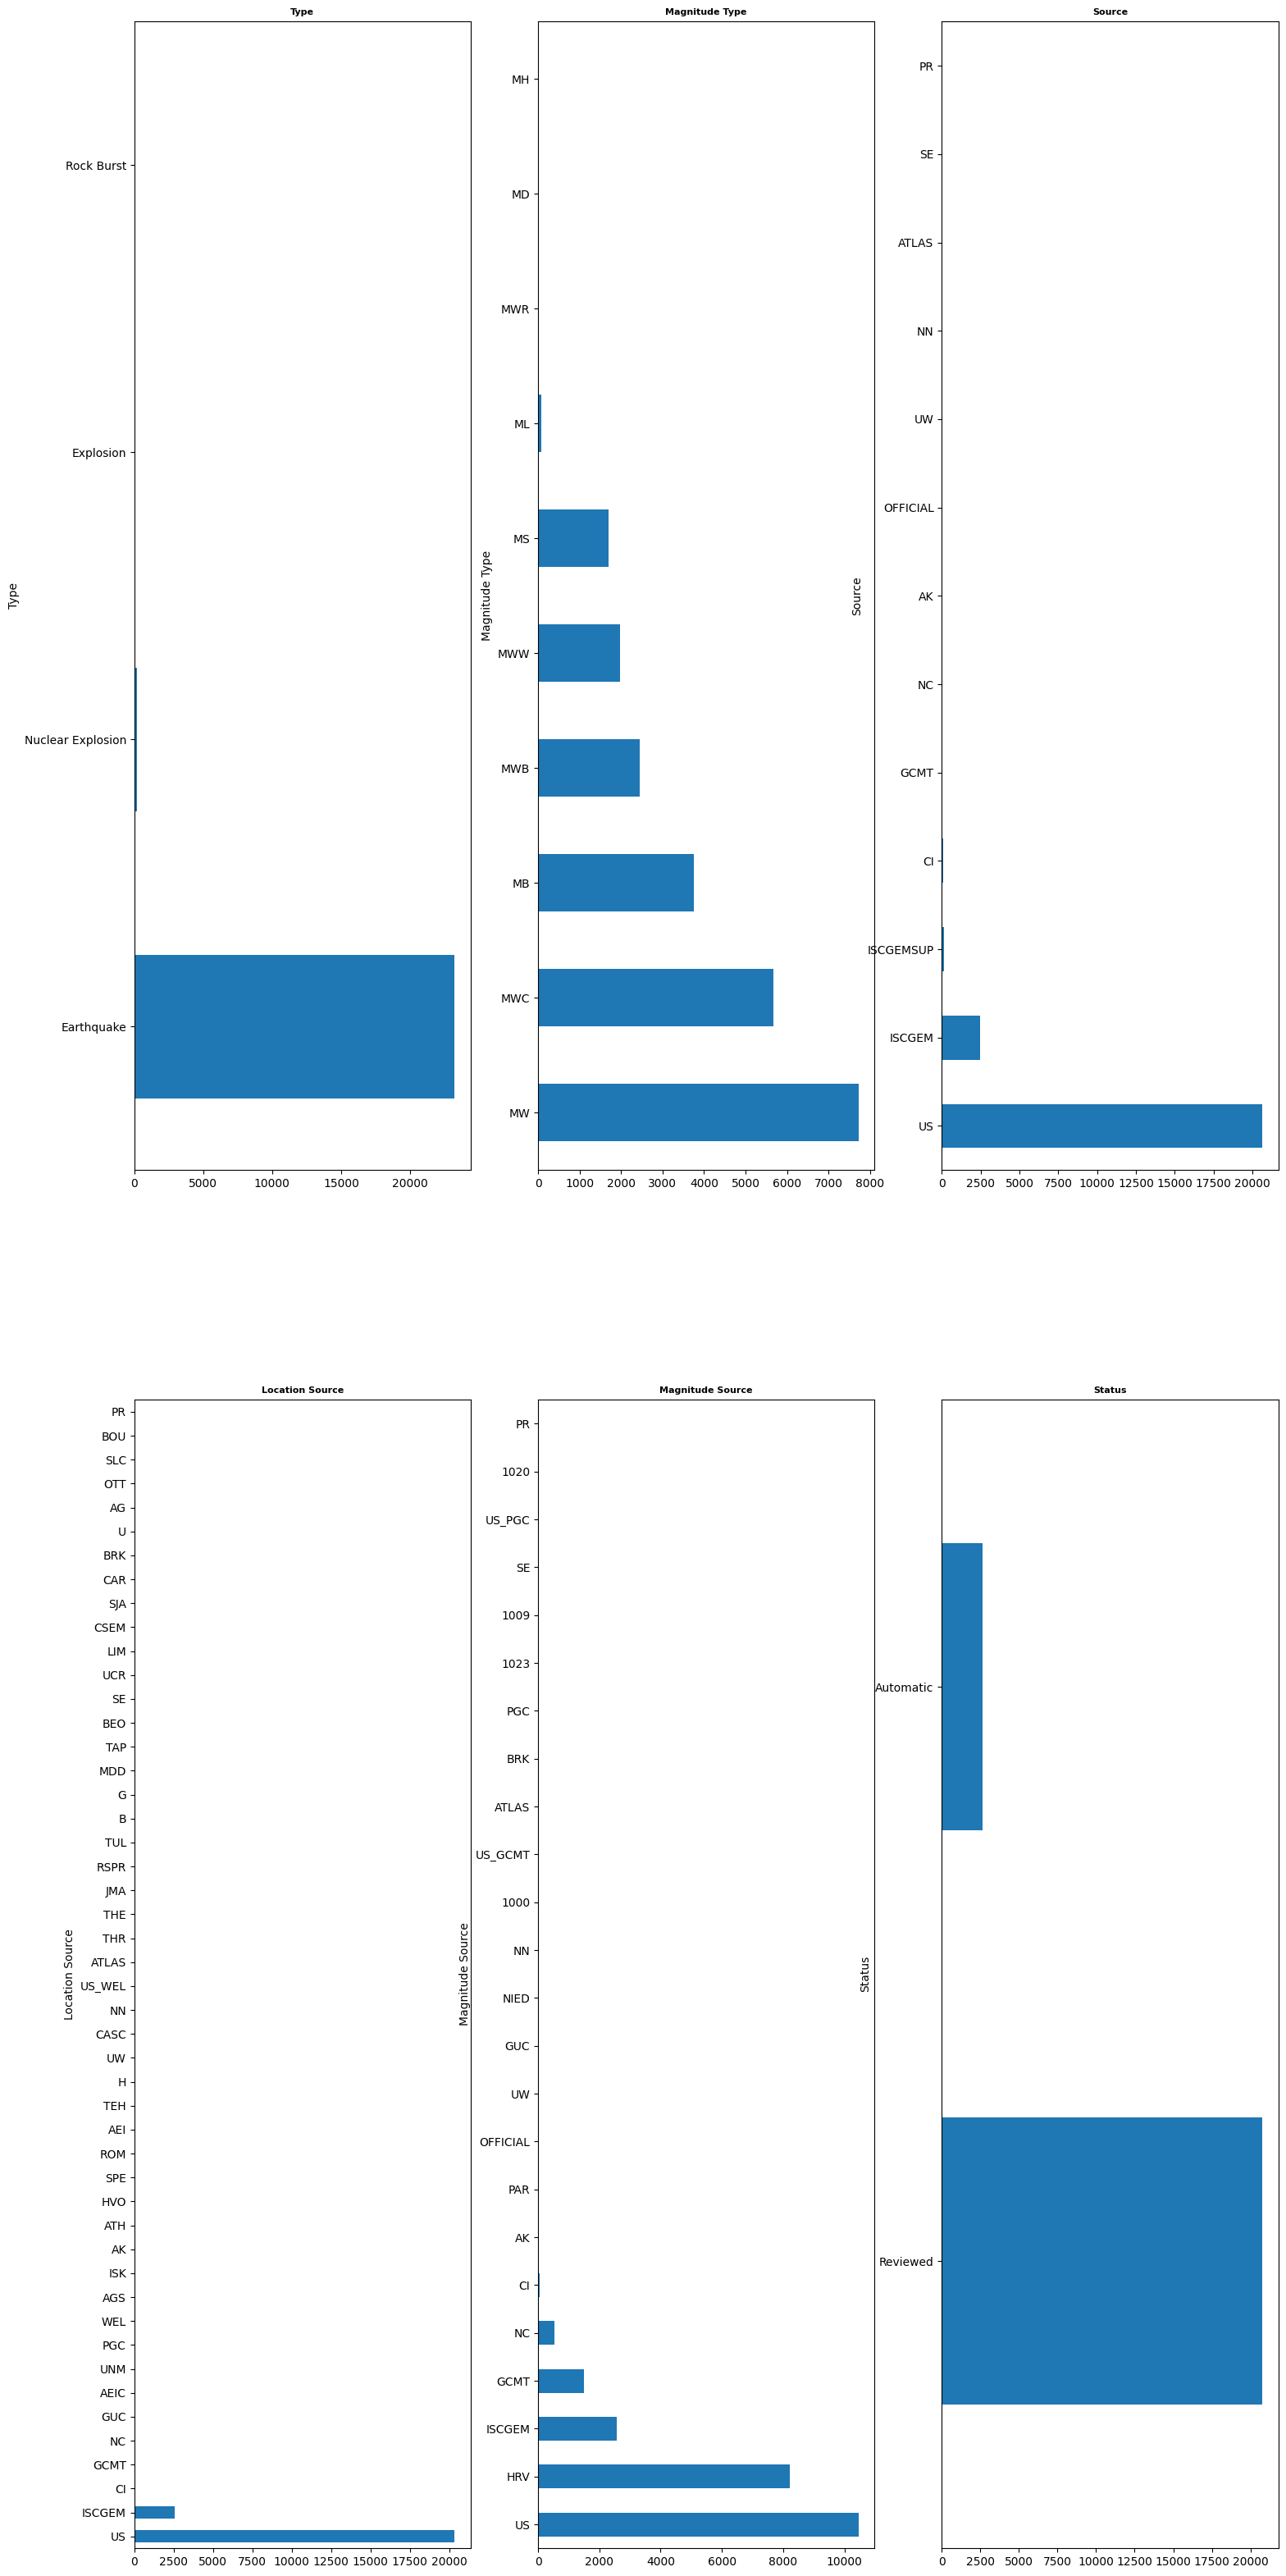

In [35]:
cat_graphic(df_clean[cat_feat_less_50nuq])

Hagamos un par de preguntas
* ¿Dónde están ubicados estos Terremotos?



In [ ]:
gb_statetime = df_clean.groupby('state')['time'].count().sort_values(ascending=False).reset_index()
gb_statetime

In [ ]:
#Prueba con IA

import pandas as pd

def change_california_names(df):
  """
  This function changes all the names in the 'place' column that contain 'California' to simply 'California'.

  Args:
      df: The pandas DataFrame containing the data.

  Returns:
      A new DataFrame with the 'place' column updated.
  """

  def update_place(place):
    if 'California' in place:
      return 'California'
    else:
      return place

  df['place'] = df['place'].apply(update_place)
  return df

# Example usage
df = pd.DataFrame({'place': ['California, USA', 'Los Angeles, California', 'New York City, New York']})
df = change_california_names(df)
print(df)


In [ ]:
gb_statetmagnitudo = df_clean.groupby('state')['magnitudo'].median().sort_values(ascending=False).reset_index()
gb_statetmagnitudo.head(20)